**Copyright 2021 Ian Effendi**

```javascript
# This Source Code Form is subject to the terms of the Mozilla Public
# License, v. 2.0. If a copy of the MPL was not distributed with this
# file, You can obtain one at https://mozilla.org/MPL/2.0/.
```

# Exploratory Data Analysis: Spending at Trump Properties

```
Author: Ian Effendi
Date: April 2021
Last Updated: April 2021
```

This is an open source notebook! You can visit the [Github repository](https://github.com/rimij405/dsci623_final) for more information about this project here. In this notebook, we take a look the [dataset](https://www.propublica.org/datastore/dataset/spending-at-trump-properties) on Trump campaign and administration spending compiled by [ProPublica](https://www.propublica.org/).

Ultimately, I want to see if there are any valuable insights we can derive from the material.

## Overview

In this notebook, we take a look the [dataset](https://www.propublica.org/datastore/dataset/spending-at-trump-properties) on Trump campaign and administration spending compiled by [ProPublica](https://www.propublica.org/).

While there aren't any explicit starting points, we should be able to answer the following questions high-level about the dataset:

1. How many records are there in the dataset?
2. What features are included in the dataset?

## Question 1

*How many records are there within the dataset?*

In [1]:
# Import useful data science packages.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read data into a pandas dataframe.
df = pd.read_csv("../src/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               1193 non-null   object 
 1   source             1193 non-null   object 
 2   date               1193 non-null   object 
 3   amount             1193 non-null   float64
 4   purpose_scrubbed   1193 non-null   object 
 5   property_scrubbed  1193 non-null   object 
 6   purpose            1182 non-null   object 
 7   property           1193 non-null   object 
 8   city               1160 non-null   object 
 9   state              1158 non-null   object 
dtypes: float64(1), object(9)
memory usage: 93.3+ KB


We've now established that there are `1193` entries in the entire dataset.

## Question 2

*What features are included in the dataset?*

In [3]:
# Identify the list of features.
features = pd.Series(df.columns)
features

0                 type
1               source
2                 date
3               amount
4     purpose_scrubbed
5    property_scrubbed
6              purpose
7             property
8                 city
9                state
dtype: object

In [4]:
# Count the number of features.
features.count()

10

We've identified `10` unique features for this dataset.

Now, we can determine details about each unique feature.

In [5]:
# Find unique values for each feature.
unique_features = { col: pd.Series(df[col].sort_values().unique()) for col in features }

### 1. type

`type` contains two unique values: `FEC` and `government`.

- `FEC` stands for the Federal Election Commission, representing expenditures by the Trump campaign.
- `government` stands for Federal and state agencies, representing expenditures by the Trump administration.

In [6]:
# List unique values in the 'type' field.
unique_features['type']

0           FEC
1    government
dtype: object

In [7]:
# Describe the type list.
df['type'].describe()

count     1193
unique       2
top        FEC
freq       841
Name: type, dtype: object

### 2. source

`source` contains the organization that made the payment. There are `137` unique `source` entries in the dataset.

In [8]:
# Count the number of unique values.
unique_features['source'].count()

137

In [9]:
# List a random 5 samples of unique values in the 'source' field.
unique_features['source'].sample(n=5)

76      Marino for Congress
66     Kansans for Marshall
67    Kansas Leadership PAC
56        Great America PAC
15      Citizens for Turner
dtype: object

In [10]:
# Describe the source
df['source'].describe()

count                                    1193
unique                                    137
top       Donald J. Trump for President, Inc.
freq                                      493
Name: source, dtype: object

Some important information to keep in mind here:

- The most frequent payer source is Donald J. Trump for President, Inc. with 493 transactions.
- There are `137` unique `source` entries in the dataset.
- A uniform distribution would have meant roughly ~8 transactions per source - we know our data will be skewed.

### 3. date

`date` contains the transaction date.

In [11]:
# Print last five dates out.
unique_features['date'].tail(5)

508    Sep 7, 2017
509    Sep 8, 2016
510    Sep 8, 2017
511    Sep 9, 2016
512      undefined
dtype: object

Here, we identify `513` unique date entries, where `undefined` is one of them.

In [12]:
df['date'].describe()

count             1193
unique             513
top       Apr 28, 2017
freq                22
Name: date, dtype: object

Notice how the `dtype` is `object`. Our `DataFrame` won't sort our dates by their values, instead treating them like plain strings. We should convert this value into the `datetime` format, so that we can make comparisons with the value of a given date, as well as perform numeric calculations based on the `datetime` value.

In [13]:
# Convert column to date time.
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y', errors='coerce')
df['date']

0      2015-04-30
1      2015-05-05
2      2015-06-16
3      2015-06-16
4      2015-06-16
          ...    
1188          NaT
1189          NaT
1190          NaT
1191          NaT
1192   2017-01-24
Name: date, Length: 1193, dtype: datetime64[ns]

In [14]:
unique_features['date'] = pd.Series(df['date'].sort_values().unique())
unique_features['date']

0     2015-04-30
1     2015-05-03
2     2015-05-05
3     2015-06-16
4     2015-06-17
         ...    
508   2018-05-01
509   2018-05-02
510   2018-05-03
511   2018-05-08
512          NaT
Length: 513, dtype: datetime64[ns]

### 4. amount

`amount` contains the transaction amount.

In [15]:
# Display info.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['amount'].describe()

count      1193.00
mean      13483.58
std       70755.00
min      -11541.20
25%         174.04
50%         662.99
75%        2679.33
max     1271944.00
Name: amount, dtype: float64

Positive amounts are payments from the `source` payer to the `property` payee. Negative amounts are likely refunds.

Of note, the largest payment was $\$1,271,944.00$ and the smallest was $\$11,541.20$.

### 5. purpose_scrubbed

The `purpose_scrubbed` is the reason for the transaction. These classification labels were picked by ProPublica to categorize the values in the `purpose` feature.

In [16]:
# List unique `purpose_scrubbed` items.
unique_features['purpose_scrubbed']

0      Event
1       Food
2      Legal
3    Lodging
4      Other
5    Payroll
6       Rent
7     Travel
dtype: object

There are `8` unique `purpose_scrubbed` entries.

In [17]:
# Describe the feature.
df['purpose_scrubbed'].describe()

count        1193
unique          8
top       Lodging
freq          438
Name: purpose_scrubbed, dtype: object

`Lodging` is the most frequent `purpose_scrubbed` with `438` transactions associated with the purpose.

### 6. property_scrubbed

The `property_scrubbed` is the `payee` institution receiving payment.

In [18]:
# List last 5 unique `property_scrubbed` items.
unique_features['property_scrubbed']

0                          BLT Prime D.C
1              Benjamin Bar & Lounge D.C
2     Eric Trump Wine Manufacturing, LLC
3                    Mar-a-Lago Club LLC
4                                  Other
5                          Tag Air, Inc.
6                  The Trump Corporation
7                          Trump CPS LLC
8                          Trump Cafe NY
9                        Trump Golf Club
10            Trump Golf Club Bedminster
11          Trump Golf Club Bedminster  
12             Trump Golf Club Charlotte
13                   Trump Golf Club D.C
14                  Trump Golf Club D.C.
15              Trump Golf Club Doonberg
16               Trump Golf Club Jupiter
17                  Trump Golf Club L.A.
18                 Trump Golf Club Miami
19            Trump Golf Club Palm Beach
20           Trump Golf Club Westchester
21            Trump Golf Resort Scotland
22                        Trump Grill NY
23                   Trump Hotel Chicago
24              

There are `38` unique `property_scrubbed` items. Like `purpose_scrubbed`, these are categorization labels that apply to the values found in the unscrubbed feature - in this case, for `property`.

But look closely at the list - there's a couple hidden duplicates lying about.

In [19]:
# Describe the feature.
df['property_scrubbed'].describe()

count                1193
unique                 38
top       Trump Hotel D.C
freq                  197
Name: property_scrubbed, dtype: object

`Trump Hotel D.C` is the most common `property_scrubbed` item but it definitely will have some sort of impact on the dataset. Some `property_scrubbed` entries for `D.C.` don't consistently place the second punctuation mark, so duplicates go untreated.

In [20]:
# First, find all rows that match the 'D.C' prompt.
df['property_scrubbed'] = df['property_scrubbed'].replace({
    "Trump Hotel D.C": "Trump Hotel D.C.",
    "Trump Golf Club D.C": "Trump Golf Club D.C.",
    "Benjamin Bar & Lounge D.C": "Benjamin Bar & Lounge D.C.",
    "BLT Prime D.C": "BLT Prime D.C."
})
df['property_scrubbed'].describe()

count                 1193
unique                  36
top       Trump Hotel D.C.
freq                   267
Name: property_scrubbed, dtype: object

After cleaning the feature, there are `36` unique scrubbed properties and the most frequent property is `Trump Hotel D.C.`.

### 7. purpose

Various, unscrubbed `purpose` data.

In [21]:
unique_features['purpose']

0                                     002 Travel Parking
1      1ST BANKCARD PMT [SB21B.15922]: EVENT EXPENSE:...
2      1ST BANKCARD PMT [SB21B.15922]: FUNDRAISING EX...
3      1ST BANKCARD PMT [SB21B.18545]: EVENT EXPENSE:...
4        1ST BANKCARD PMT [SB21B.19723]: MEETING EXPENSE
                             ...                        
228                                      meeting expense
229                               political contribution
230                                 staff retreat dinner
231                                               travel
232                                                  NaN
Length: 233, dtype: object

The `purpose` feature would be useful if we were to require a predictive model that determines an output `purpose_scrubbed` classification.

In [22]:
df['purpose'].describe()

count               1182
unique               232
top       Hotels-Lodging
freq                 201
Name: purpose, dtype: object

### 8. property

Various, unscrubbed `property` data.

In [23]:
unique_features['property']

0           BENJAMIN BAR & LOUNGE
1         BENJAMIN BAR AND LOUNGE
2                             BLT
3                       BLT PRIME
4        BLT PRIME BY DAVID BURKE
                  ...            
112                    Trump Soho
113                   Trump Tower
114    Trump Tower Hotel New York
115               Trump Turnberry
116                 Wollman Rink 
Length: 117, dtype: object

In [24]:
df['property'].describe()

count                                    1193
unique                                    117
top       Trump International Hotel Las Vegas
freq                                      128
Name: property, dtype: object

Interestingly, the unscrubbed field reports the `Trump International Hotel Las Vegas` as the most common `property`, but our `property_scrubbed` suggests that `Trump Hotel D.C.` is the most common.

In [25]:
# Search for all property_scrubbed entries containing D.C. and select their property fields.
dc_properties = pd.Series(df[df['property_scrubbed'].str.contains('Hotel D.C.')]['property'].unique())
dc_properties

0                             TRUMP OLD POST OFFICE LLC
1                             TRUMP INTERNATIONAL HOTEL
2                  TRUMP INTERNATIONAL HOTEL WASHINGTON
3               TRUMP INTERNATIONAL HOTEL WASHINGTON DC
4                                  THE TRUMP INTL HOTEL
5                             Trump International Hotel
6                  Trump International Hotel Washington
7                                           Trump Hotel
8     TRUMP INTERNATIONAL HOTEL WDC                 ...
9                          Trump International Hotel DC
10                            OPO LOUNGE AT TRUMP HOTEL
11           TRUMP INTERNATIONAL HOTEL WASHINGTON, D.C.
12                                TRUMP OLD POST OFFICE
13                        TRUMP INTERNATIONAL HOTEL WDC
14                                    TRUMP INT'L HOTEL
15                                          TRUMP HOTEL
16                 TRUMP INTERNATIONAL HOTEL RESTAURANT
17            Trump International Hotel - Washin

There are some interesting things at play here. At first glance, someone reading the transaction details might wonder why `TRUMP OLD POST OFFICE` (and similar variations) were classified as `Trump Hotel D.C.`.

The answer isn't immediately clear but a quick search turns up a [Wikipedia entry](https://en.wikipedia.org/wiki/Old_Post_Office_(Washington,_D.C.)) with this information:

> In 2013, the U.S. General Services Administration (GSA) leased the property for 60 years to a consortium headed by "DJT Holdings LLC", a holding company that Donald Trump owns through a revocable trust. Trump developed the property into a luxury hotel, the Trump International Hotel Washington, D.C., which opened in September 2016.

### 9. city

The city supposedly refers to the location where the transaction took place.

In [26]:
# Display unique feature values.
unique_features['city']

0             561-8322600
1             Bedminister
2              Bedminster
3               Bradenton
4        Briarcliff Manor
5         Charlottesville
6                 Chicago
7                Doonberg
8                   Doral
9              Hicksville
10               Honolulu
11                Jupiter
12              Lafayette
13             Las Veagas
14              Las Vegas
15                  Miami
16            Mooresville
17            Moorseville
18               New York
19             Palm Beach
20            Panama City
21          Potomac Falls
22           Rancho Palos
23    Rancho Palos Verdes
24            S61-8322600
25          San Francisco
26               Sterling
27              Turnberry
28              Vancouver
29             Washington
30        West Palm Beach
31                    NaN
dtype: object

In [27]:
# Display feature description.
df['city'].describe()

count           1160
unique            31
top       Washington
freq             350
Name: city, dtype: object

There are some confusing entries and typos in the `city` feature. Here is a list of the issues I could find:

- `561-8322600` isn't a city, but it could be a telephone number. Could we use the zipcode to solve our missing city dilemma?
- `561-8322600` and `S61-8322600` are close enough to be related. Which is the typo?
- `Bedminister` vs. `Bedminster`
- `Las Veagas` vs. `Las Vegas`
- `Moorseville` vs. `Mooresville`
- `NaN` entries could have states or it could refer to a place like `Washington D.C.`.
- Does `Washington` refer to `Washington State` or `Washington D.C.`? Or is it (in the worst case) referring to both?

Let's use the state field in order to check where each of our problem states are from.

In [28]:
# Create lookup table of city, state.
city_state = df[['city', 'state']]

# Service method to facilitate similarity searches easily.
def is_similar(table, feature, term, case=False, na=False):
    return table[feature].str.contains(term, case=case, na=na)

In [29]:
# Bedminister vs. Bedminster
city_state[is_similar(city_state, 'city', 'Bedmin')]['city'].unique()

array(['Bedminster', 'Bedminister'], dtype=object)

In [30]:
# Las Vaegas vs. Las Vegas
city_state[is_similar(city_state, 'city', 'Las Vea?gas')]['city'].unique()

array(['Las Vegas', 'Las Veagas'], dtype=object)

In [31]:
# Moorseville vs. Mooresville
city_state[is_similar(city_state, 'city', 'Moor.[es]ville')]['city'].unique()

array(['Moorseville', 'Mooresville'], dtype=object)

In [32]:
# Figure out city 561 belongs to.
city_state[city_state['city'].str.contains('561', case=False, na=False)]

,city,state
930,561-8322600,FL
1072,561-8322600,FL


Let's fix those typos. Our first pass will use the `pd.DataFrame.replace` method, taking in a dictionary with the correct spellings. We'll change the data in the following ways:

- `S61-8322600` and `561-8322600` will become `West Palm Beach`, FL.
- `Bedminister` will become `Bedminster` (as in Bedminster, NJ).
- `Las Veagas` will become `Vegas` (as in Las Vegas, NV).
- `Moorseville` will become `Mooresville` (as in Mooresville, NC).

In [33]:
# Replace typoes.
df['city'] = df['city'].replace({
    "S61-8322600": "West Palm Beach",
    "561-8322600": "West Palm Beach",
    "Bedminister": "Bedminster",
    "Moorseville": "Mooresville"
})

# Update unique feature values
unique_features['city'] = pd.Series(df['city'].unique())
unique_features['city']

0                New York
1              Hicksville
2         West Palm Beach
3               Las Vegas
4              Washington
5                   Miami
6                 Chicago
7         Charlottesville
8                 Jupiter
9              Bedminster
10       Briarcliff Manor
11            Mooresville
12          Potomac Falls
13                  Doral
14               Sterling
15             Las Veagas
16              Lafayette
17    Rancho Palos Verdes
18             Palm Beach
19              Bradenton
20               Honolulu
21              Turnberry
22            Panama City
23                    NaN
24              Vancouver
25               Doonberg
26          San Francisco
27           Rancho Palos
dtype: object

In [34]:
df['city'].describe()

count           1160
unique            27
top       Washington
freq             350
Name: city, dtype: object

Now we know there are 27 unique cities.

### 10. state

In [35]:
unique_features['state']

0     British Columbia
1                   CA
2                   DC
3                   FL
4                   HI
5                   IL
6              Ireland
7                   LA
8                   NC
9                   NJ
10                  NV
11                  NY
12              Panama
13            Scotland
14                  VA
15                 NaN
dtype: object

In [36]:
df['state'].describe()

count     1158
unique      15
top         NY
freq       394
Name: state, dtype: object

## Charting Data

*Are there trends we can visualize?*

A good starting point is with a time-series plotting transactions over time.

In [37]:
# Get special table that just lists the date and the amount.
ts_amount = df[['date','amount']]
ts_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1188 non-null   datetime64[ns]
 1   amount  1193 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.8 KB


In [38]:
# Groupby date.
date_idx = ts_amount['date']
date_amount = ts_amount.groupby(date_idx).sum()
date_amount

,amount
date,
2015-04-30,1380.54
2015-05-03,1303.46
2015-05-05,9583.33
2015-06-16,557303.33
2015-06-17,814.24
...,...
2018-04-30,861.77
2018-05-01,1635.10
2018-05-02,247.90


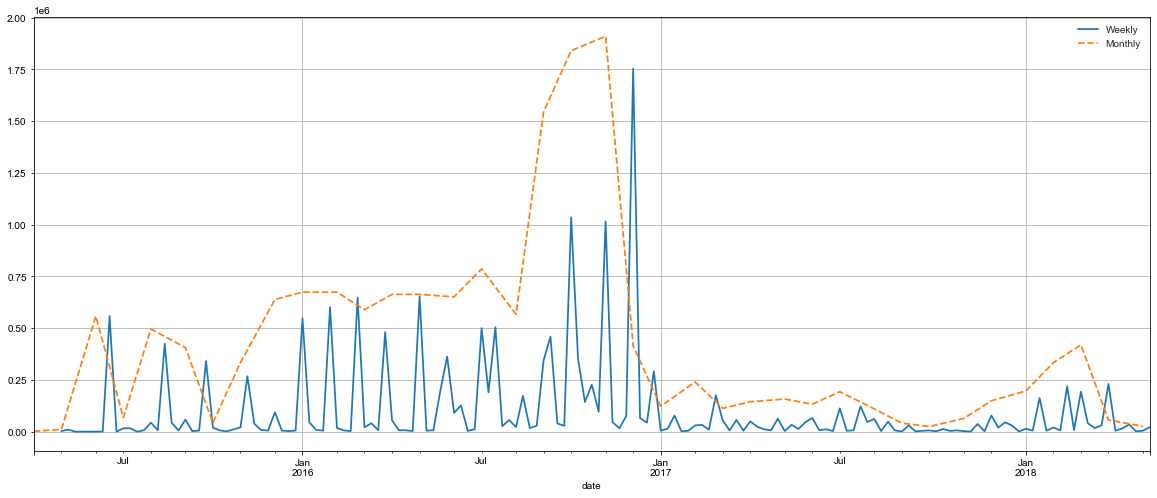

In [39]:
# Plot figure/grid.
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('seaborn')

# date_amount.plot(ax=ax, alpha=0.5, style='-')
date_amount.resample('W').sum().plot(ax=ax, style='-')
date_amount.resample('M').sum().plot(ax=ax, style='--')
ax.legend(['Weekly', 'Monthly'])

What about organizing payments by payers?

In [40]:
df[['date', 'purpose_scrubbed', 'amount']]

,date,purpose_scrubbed,amount
0,2015-04-30,Lodging,1380.54
1,2015-05-05,Rent,9583.33
2,2015-06-16,Event,37993.04
3,2015-06-16,Lodging,3240.96
4,2015-06-16,Rent,9583.33
...,...,...,...
1188,NaT,Other,5583.13
1189,NaT,Other,4853.29
1190,NaT,Other,10398.33
1191,NaT,Other,592.13


In [41]:
df2 = df.groupby(['date', 'purpose_scrubbed'])
df2.sum()

amount
date       purpose_scrubbed         
2015-04-30 Lodging           1380.54
2015-05-03 Event             1303.46
2015-05-05 Rent              9583.33
2015-06-16 Event            37993.04
           Lodging           3240.96
...                              ...
2018-04-30 Lodging            686.50
2018-05-01 Food              1635.10
2018-05-02 Lodging            247.90
2018-05-03 Lodging           1737.04
2018-05-08 Event            21835.63

[766 rows x 1 columns]

count     8.00
mean    149.12
std     138.52
min       7.00
25%      68.00
50%     100.00
75%     181.00
max     438.00
Name: amount, dtype: float64

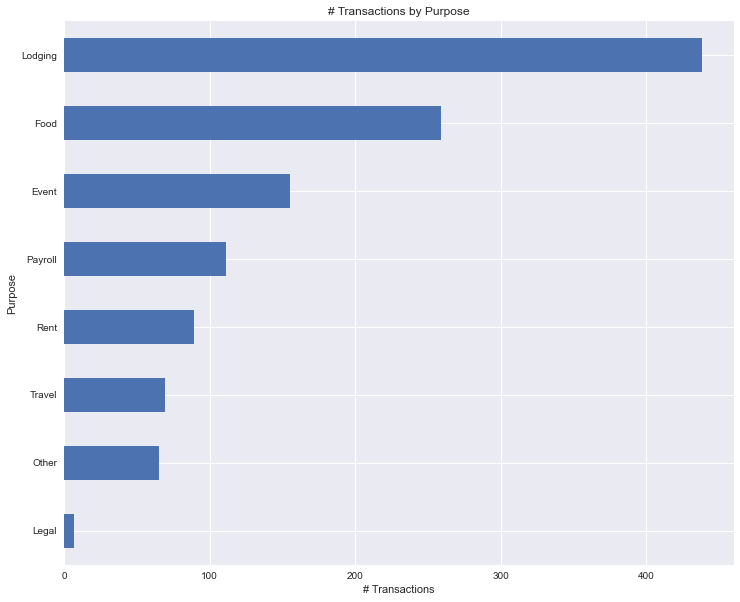

In [42]:
# Prepare data to graph.
df_purpose = df.groupby(['purpose_scrubbed']).count()['amount'].sort_values()

# Plot figure/grid.
fig, ax = plt.subplots(figsize=(12,10))

# Plot the chart.
df_purpose.plot.barh(ax=ax)

# Style the plot.
ax.set_xlabel('# Transactions')
ax.set_ylabel('Purpose')
ax.set_title('# Transactions by Purpose')
ax.grid(True)

# Describe the data.
df_purpose.describe()

count    36.00
mean     33.14
std      52.59
min       1.00
25%       6.00
50%      11.50
75%      39.25
max     267.00
Name: amount, dtype: float64

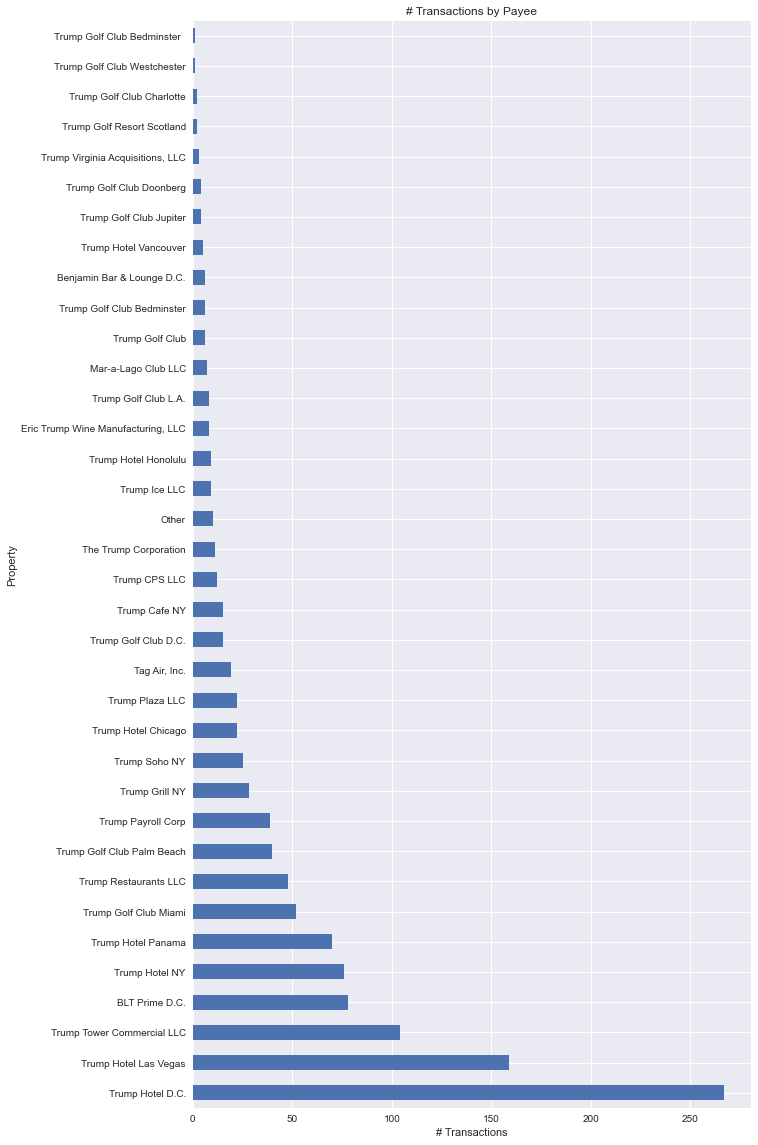

In [43]:
# Prepare data to graph.
df_purpose = df.groupby(['property_scrubbed']).count()['amount'].sort_values(ascending=False)

# Plot figure/grid.
fig, ax = plt.subplots(figsize=(10,20))

# Plot the chart.
df_purpose.plot.barh(ax=ax)

# Style the plot.
ax.set_xlabel('# Transactions')
ax.set_ylabel('Property')
ax.set_title('# Transactions by Payee')
ax.grid(True)

# Describe the data.
df_purpose.describe()